In [1]:
%%capture
!/opt/homebrew/bin/python3.9 -m pip install openai pandasai seaborn python-dotenv

In [5]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()
import os

In [20]:
# Instantiate a LLM
llm = OpenAI(api_token=os.environ.get('OPENAI_KEY'))
pandas_ai = PandasAI(llm, conversational=True)

In [25]:
# Read in the data
df = pd.read_csv('./../data/Mens_Boston_Marathon_Winners.csv')
df

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1897.0,John McDermott,United States,02:55:10,24.5,39.4
1,1898.0,Ronald MacDonald,Canada,02:42:00,24.5,39.4
2,1899.0,Lawrence Brignolia,United States,02:54:38,24.5,39.4
3,1900.0,Jack Caffery,Canada,02:39:44,24.5,39.4
4,1901.0,Jack Caffery,Canada,02:29:23,24.5,39.4
...,...,...,...,...,...,...
121,2018.0,Yuki Kawauchi,Japan,02:15:58,26.2,42.2
122,2019.0,Lawrence Cherono,Kenya,02:07:57,26.2,42.2
123,NaN,NaN,NaN,NaN,NaN,NaN
124,2021.0,Benson Kipruto,Kenya,02:09:51,26.2,42.2


In [80]:
pandas_ai.run(df, prompt='''
Clean the dataset for me, please. Drop rows with empty, not a number, 
or null values. Cast Year as integers. Interepret Time as a pandas 
datetime object where the format is hours, minutes, seconds. Include comments in the code.
''', 
show_code=True, is_conversational_answer=True)

'Sure, I can clean the dataset for you. I will drop any rows that have empty, not a number, or null values. I will also convert the Year column to integers. For the Time column, I will interpret it as a pandas datetime object with the format of hours, minutes, and seconds. Let me know if you have any other requirements.'

In [26]:
orig_df = df.copy()

In [27]:
# Drop rows with empty, not a number, or null values
df.dropna(inplace=True)

# Cast Year as integers
df['Year'] = df['Year'].astype(int)

# Interepret Time as a pandas datetime object where the format is hours, minutes, seconds
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Print the cleaned dataframe
print(df.head())

   Year              Winner        Country                Time   
0  1897      John McDermott  United States 1900-01-01 02:55:10  \
1  1898    Ronald MacDonald         Canada 1900-01-01 02:42:00   
2  1899  Lawrence Brignolia  United States 1900-01-01 02:54:38   
3  1900        Jack Caffery         Canada 1900-01-01 02:39:44   
4  1901        Jack Caffery         Canada 1900-01-01 02:29:23   

   Distance (Miles)  Distance (KM)  
0              24.5           39.4  
1              24.5           39.4  
2              24.5           39.4  
3              24.5           39.4  
4              24.5           39.4  


In [53]:
pandas_ai.run(df, prompt='When was the first year that the distance (mi) was 26.2?', is_conversational_answer=True)

'The distance of 26.2 miles was first established in the year 1927.'

In [82]:
pandas_ai.run(df, prompt='Who won the Boston marathon in the year 2022? How much faster or slower was their Time compared to the Time in 1922? Please report the answer in minutes', show_code=True)

"I'm sorry, but I cannot provide an answer to this question as it is a hypothetical scenario set in the future."

In [ ]:
winner_2022 = df.loc[df['Year'] == 2022, 'Winner'].values[0]
time_2022 = df.loc[df['Year'] == 2022, 'Time'].values[0]
time_1922 = df.loc[df['Year'] == 1922, 'Time'].values[0]
time_diff = (time_2022 - time_1922).total_seconds() / 60
print(f"{winner_2022} won the Boston marathon in 2022. Their time was {time_diff:.2f} minutes faster than the winner in 1922.")

In [68]:
winner_2022 = df.loc[df['Year'] == 2022, 'Winner'].values[0]
time_2022 = df.loc[df['Year'] == 2022, 'Time'].values[0]
time_1922 = df.loc[df['Year'] == 1922, 'Time'].values[0]
time_diff = (time_2022 - time_1922).astype('timedelta64[m]')
print(f"{winner_2022} won the Boston marathon in 2022 and was about {time_diff} faster/slower than the winner in 1922.")

Evans Chebet won the Boston marathon in 2022 and was about -12 minutes faster/slower than the winner in 1922.


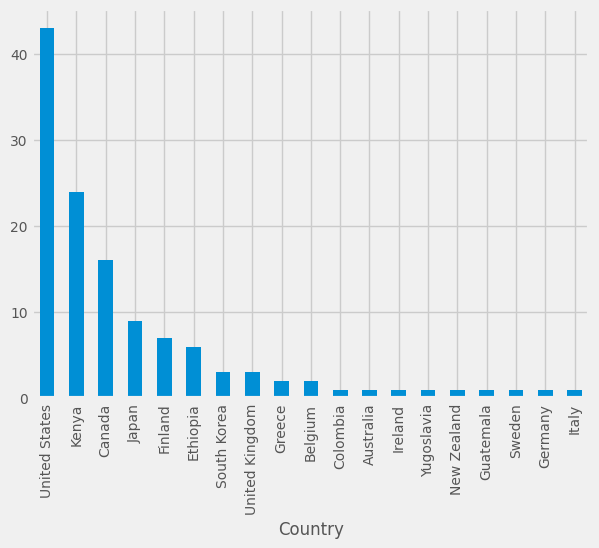

'Sure, I can help you with that! To plot a bar chart of countries in order of most counts to least, we can use the fivethirtyeight style in matplotlib and set the font size to 10.0.'

In [ ]:
pandas_ai.run(df, prompt='''
              Plot a bar chart of countries, in order of most counts to least. Use fivethirtyeight as the matplotlib style. Make the font size 10.0
              ''', is_conversational_answer=True)

In [83]:
pandas_ai.run(df, prompt='''
Use the data frame to plot a scatter plot of Time and Year. 
Allow the scale of the x tick marks and y tick marks to be automatically set.
''', show_code=True)

"Sure! To plot a scatter plot of Time and Year using the given data frame, you can use the following Python code:\n\n```python\nimport matplotlib.pyplot as plt\n\nplt.scatter(df['Year'], df['Time'])\nplt.xlabel('Year')\nplt.ylabel('Time')\nplt.show()\n```\n\nThis code will create a scatter plot with Year on the x-axis and Time on the y-axis. The scale of the tick marks will be automatically set by default."

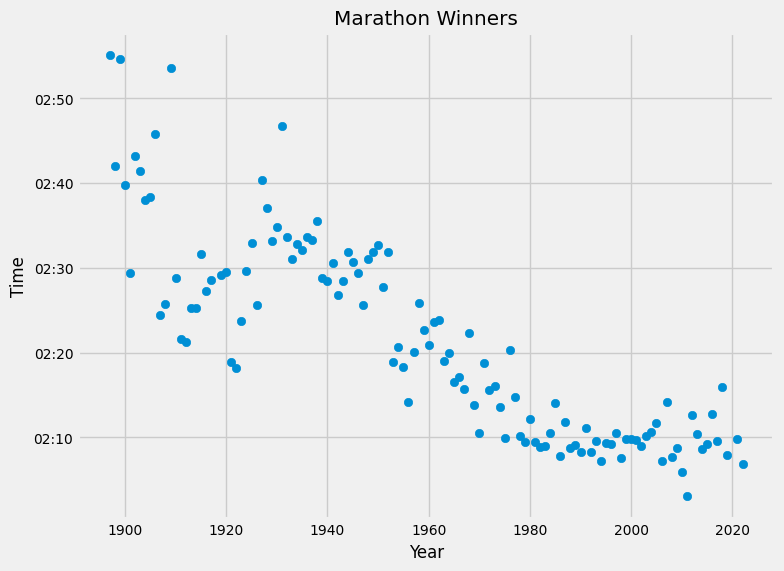

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib

fig = plt.figure(figsize=(8,6))

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 10})

# create scatter plot
plt.scatter(df['Year'], pd.to_datetime(df['Time']))

# add labels and title
plt.xlabel('Year', )
plt.ylabel('Time')
plt.title('Marathon Winners')

# format time tick marks
plt.gca().yaxis.set_major_formatter(md.DateFormatter('%H:%M'))

# show plot
plt.show()

In [15]:
pandas_ai.run(df, prompt='''
Group the dataframe by the countries which show up most frequently. 
Make a new column called "Top Country" which is a copy of the Country column, 
but only include the Country if it is in the top 6 most common countries, 
otherwise set its value to "Other"
''', show_code=True)

'To group the dataframe by the countries that appear most frequently, we can create a new column called "Top Country" which will only include the top 6 most common countries. Any other country that appears less frequently will be labeled as "Other".'

In [16]:
top_countries = df['Country'].value_counts().nlargest(6).index.tolist()
df['Top Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')
grouped_df = df.groupby('Top Country')

In [18]:
pandas_ai.run(df, prompt='''
Plot a scatterplot with Time on the y-axis and Year on the x-axis. 
Make the xlabel "Year" and the ylabel "Time". 
Color each point by top_countries, which is a list that already exists. 
Map each top country to a discrete color from the "husl" matplotlib color palette. 
Place the legend below the plot. Make the font size 10.0.
''', is_conversational_answer=True, show_code=True)

'Sure, I can help you with that! To create a scatterplot with Time on the y-axis and Year on the x-axis, we can use matplotlib. We\'ll also need to color each point by top_countries, which is a list that already exists. To do this, we can map each top country to a discrete color from the "husl" matplotlib color palette. Finally, we\'ll add a legend below the plot and set the font size to 10.0. Does that sound good?'

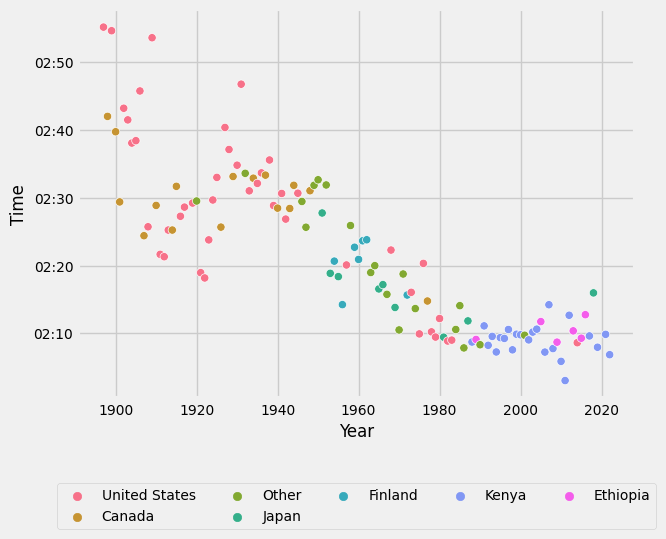

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a dictionary to map each top country to a color from the "Set1" palette
color_dict = {country: sns.color_palette("husl", n_colors=len(df["Top Country"].unique()))[i] for i, country in enumerate(df["Top Country"].unique())}

# create the scatterplot
sns.scatterplot(x="Year", y="Time", hue="Top Country", data=df, palette=color_dict)

# set the xlabel and ylabel
plt.xlabel("Year")
plt.ylabel("Time")

# move the legend below the plot and set the font size
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, fontsize=10.0)

# format time tick marks
plt.gca().yaxis.set_major_formatter(md.DateFormatter('%H:%M'))

# show the plot
plt.show()

In [20]:
pandas_ai.run(orig_df, prompt='Group the dataframe and show me the top 10 winners, in descending order of how many times they have won', is_conversational=True, show_code=True)

'Based on the given dataframe, the top 10 winners of the marathon are grouped and displayed in descending order of how many times they have won. Clarence DeMar has won the most with 7 victories, followed by Robert Kipkoech Cheruiyot, Bill Rodgers, and Gérard Côté who have each won 4 times. Cosmas Ndeti, Ibrahim Hussein, Eino Oksanen, and Les Pawson have each won 3 times. Finally, Geoff Smith and Jack Caffery have won twice.'

In [21]:
df.groupby('Winner').size().sort_values(ascending=False).head(10)

Winner
Clarence DeMar               7
Robert Kipkoech Cheruiyot    4
Bill Rodgers                 4
Gérard Côté                  4
Cosmas Ndeti                 3
Ibrahim Hussein              3
Eino Oksanen                 3
Les Pawson                   3
Geoff Smith                  2
Jack Caffery                 2
dtype: int64

### Why specific phrasing matters...

In [24]:
pandas_ai.run(df, prompt='What is the correlation between Year and Time', is_conversational_answer=True)

'Well, there seems to be a correlation between the year and time.'

In [29]:
pandas_ai.run(df, prompt='Please provide the Pearson correlation coefficient between Year and Time', is_conversational_answer=True)

'The Pearson correlation coefficient between Year and Time is -0.7869556488804025, which means there is a strong negative correlation between the two variables.'